# E-commerce Shipping Data
- 제품 배송 시간에 맞춰 배송이 되었는지 예측(binary classification task)

- 주요 feature
    - ID: ID Number of Customers.
        - 고객의 ID 번호입니다.
    - Warehouse block: The Company have big - Warehouse which is divided in to block such as A,B,C,D,E.
        - 회사는 A,B,C,D,E와 같은 블록으로 구분된 큰 창고를 가지고 있습니다.
    - Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
        - 회사는 선박, 항공, 육로 등 다양한 방법으로 제품을 배송합니다.
    - Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
        - 배송조회 문의에서 걸려온 전화수입니다.
    - Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
        - 회사는 모든 고객으로부터 평가했습니다. 1이 가장 낮음(최악), 5가 가장 높음(최상)입니다.
    - Cost of the product: Cost of the Product in US Dollars.
        - 제품 비용(미국 달러).
    - Prior purchases: The Number of Prior Purchase.
        - 이전 구매 수.
    - Product importance: The company has categorized the product in the various parameter such as low, medium, high.
        - 회사는 제품을 낮음, 중간, 높음과 같은 다양한 매개변수로 분류했습니다.
    - Gender: Male and Female.
        - 남성과 여성.
    - Discount offered: Discount offered on that specific product.
        - 특정 제품에 대해 제공되는 할인.
    - Weight in gms: It is the weight in grams.
        - 무게(g)입니다.
    - **[LABEL] Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
        - 목표 변수로, 1은 제품이 정시에 도달하지 않았음을 나타내고 0은 정시에 도달했음을 나타냅니다.

---
- [reference : e-commerce shipping data in KAGGLE](https://www.kaggle.com/datasets/prachi13/customer-analytics)
- 빅분기 2회 실기 기출 데이터셋 이라고 합니다.

In [1]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    print('Mac')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)
    print('Window')

Window


In [2]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data\X_test.csv
./data\X_train.csv
./data\y_train.csv
./data\test_label\y_test.csv


In [3]:
x_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')

df = pd.merge(x_train, y_train, how='inner', on='ID')
df.drop(columns=['ID'], inplace=True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,A,Flight,4,3,266,5,high,F,5,1590,0
1,F,Ship,3,1,174,2,low,M,44,1556,1
2,F,Road,4,1,154,10,high,M,10,5674,1
3,F,Ship,4,3,158,3,medium,F,27,1207,1
4,A,Flight,5,3,175,3,low,M,7,4833,1


In [4]:
x_test = pd.read_csv('./data/X_test.csv')
y_test = pd.read_csv('./data/test_label/y_test.csv')

df_test = pd.merge(x_test, y_test, how='inner', on='ID')
df_test.drop(columns=['ID'], inplace=True)
df_test.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Ship,5,2,259,5,low,F,7,1032,0
1,F,Ship,3,5,133,3,medium,F,4,5902,0
2,F,Road,3,4,191,5,medium,F,4,4243,1
3,D,Ship,4,2,221,3,low,M,10,4126,0
4,D,Flight,4,5,230,2,low,F,38,2890,1


- join data and label on `ID`
- drop `ID` feature

# #1 EDA
- 주어진 data를 EDA하고 시각화 해주세요
- 예측에 유의미한 인사이트를 서술해주세요

### # of data
- num of train data = 6598 rows
- num of test data = 4401 rows 

In [5]:
# check data num & type
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6598 entries, 0 to 6597
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      6598 non-null   object
 1   Mode_of_Shipment     6598 non-null   object
 2   Customer_care_calls  6598 non-null   object
 3   Customer_rating      6598 non-null   int64 
 4   Cost_of_the_Product  6598 non-null   int64 
 5   Prior_purchases      6598 non-null   int64 
 6   Product_importance   6598 non-null   object
 7   Gender               6598 non-null   object
 8   Discount_offered     6598 non-null   int64 
 9   Weight_in_gms        6598 non-null   int64 
 10  Reached.on.Time_Y.N  6598 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 618.6+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4401 entries, 0 to 4400
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      4401 non-null   object
 1   Mode_of_Shipment     4401 non-null   object
 2   Customer_care_calls  4401 non-null   object
 3   Customer_rating      4401 non-null   int64 
 4   Cost_of_the_Product  4401 non-null   int64 
 5   Prior_purchases      4401 non-null   int64 
 6   Product_importance   4401 non-null   object
 7   Gender               4401 non-null   object
 8   Discount_offered     4401 non-null   int64 
 9   Weight_in_gms        4401 non-null   int64 
 10  Reached.on.Time_Y.N  4401 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 412.6+ KB


In [7]:
# check distrution
print('numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다')
col_num = []
col_cate = []

def distribute_col(col):
    print(col,target.unique())
    display(target.value_counts().to_frame())
    print()

for col in df.columns:
    target = df[col]
    if target.dtype == 'O':
        col_cate.append(col)
        distribute_col(col)
    else:
        if target.nunique() <=10:
            col_cate.append(col)
            distribute_col(col)
        else:
            col_num.append(col)

print('feature 분류')
print(f'numeric features : {col_num}')
print(f'categoric features : {col_cate}')

numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다
Warehouse_block ['A' 'F' 'C' 'B' 'D']


,Warehouse_block
F,2262
B,1116
A,1090
D,1069
C,1061



Mode_of_Shipment ['Flight' 'Ship' 'Road']


,Mode_of_Shipment
Ship,4512
Flight,1066
Road,1020



Customer_care_calls ['4' '3' '5' '6' '2' '$7']


,Customer_care_calls
4,2115
3,1919
5,1403
6,604
2,404
$7,153



Customer_rating [3 1 2 5 4]


,Customer_rating
3,1367
1,1341
4,1330
5,1285
2,1275



Prior_purchases [ 5  2 10  3  4  6  7  8]


,Prior_purchases
3,2361
2,1523
4,1337
5,778
6,339
10,104
7,83
8,73



Product_importance ['high' 'low' 'medium']


,Product_importance
low,3162
medium,2866
high,570



Gender ['F' 'M']


,Gender
F,3311
M,3287



Reached.on.Time_Y.N [0 1]


,Reached.on.Time_Y.N
1,3937
0,2661



feature 분류
numeric features : ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
categoric features : ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']


### check N/A value
- 결측치 없음 ~~개이득~~

In [8]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count')

,nan_count
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0
Weight_in_gms,0


### distribution of data
- `Reached.on.Time_Y.N` : label balancing이 어느정도 잡혀있음

In [9]:
# describe numerical data's statistics
df.describe()

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,2.991361,210.393149,3.577751,13.353592,3604.191119,0.596696
std,1.409624,48.258089,1.511394,16.187267,1635.697627,0.490598
min,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2.000000,170.000000,3.000000,4.000000,1834.250000,0.000000
50%,3.000000,214.000000,3.000000,7.000000,4119.500000,1.000000
75%,4.000000,251.000000,4.000000,10.000000,5027.500000,1.000000
max,5.000000,310.000000,10.000000,65.000000,7684.000000,1.000000


In [10]:
# describe categorical data's statistics
df[col_cate].describe(include = ['object'])

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Product_importance,Gender
count,6598,6598,6598,6598,6598
unique,5,3,6,3,2
top,F,Ship,4,low,F
freq,2262,4512,2115,3162,3311


In [11]:
df.groupby(by='Reached.on.Time_Y.N').mean()

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached.on.Time_Y.N,,,,,
0,2.967681,214.236753,3.691469,5.564825,4143.727922
1,3.007366,207.795276,3.500889,18.617983,3239.520701


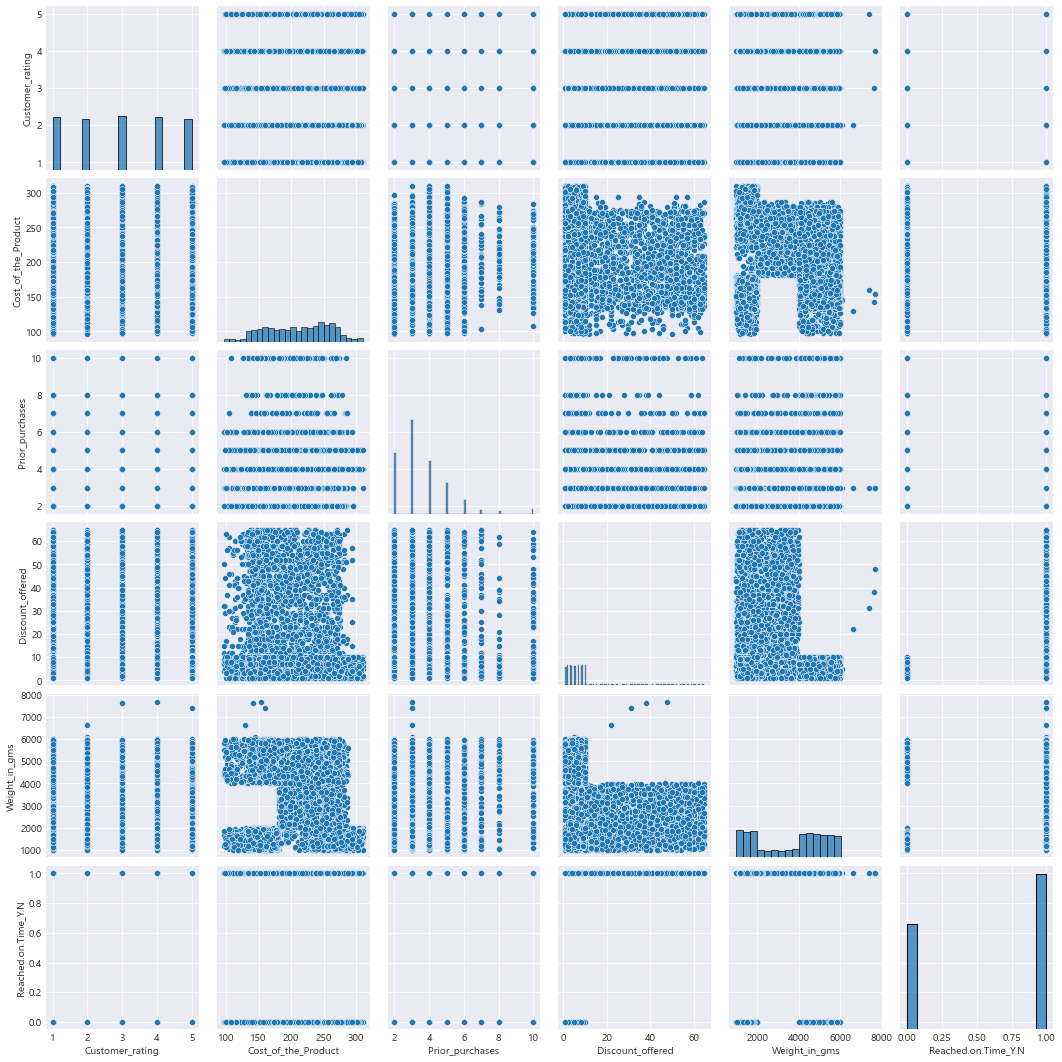

In [12]:
import seaborn as sns
sns.pairplot(df)

### check outlier
- numeric feature
- all
    - `Discount_offered`는 낮은 쪽에 쏠려 있음
- `reached on time` vs `not reached on time`
    - `reached on time`의 경우 `Discount_offered`의 분포가 조금 더 중심에 모여있음
    - `Weight_in_gms`의 boxplot을 통해 보면, 무거운 물건의 정시 배송이 더 많음 -> 의외였음 ~~앞으로 무거운 물건 배달 많이 시키자...?~~

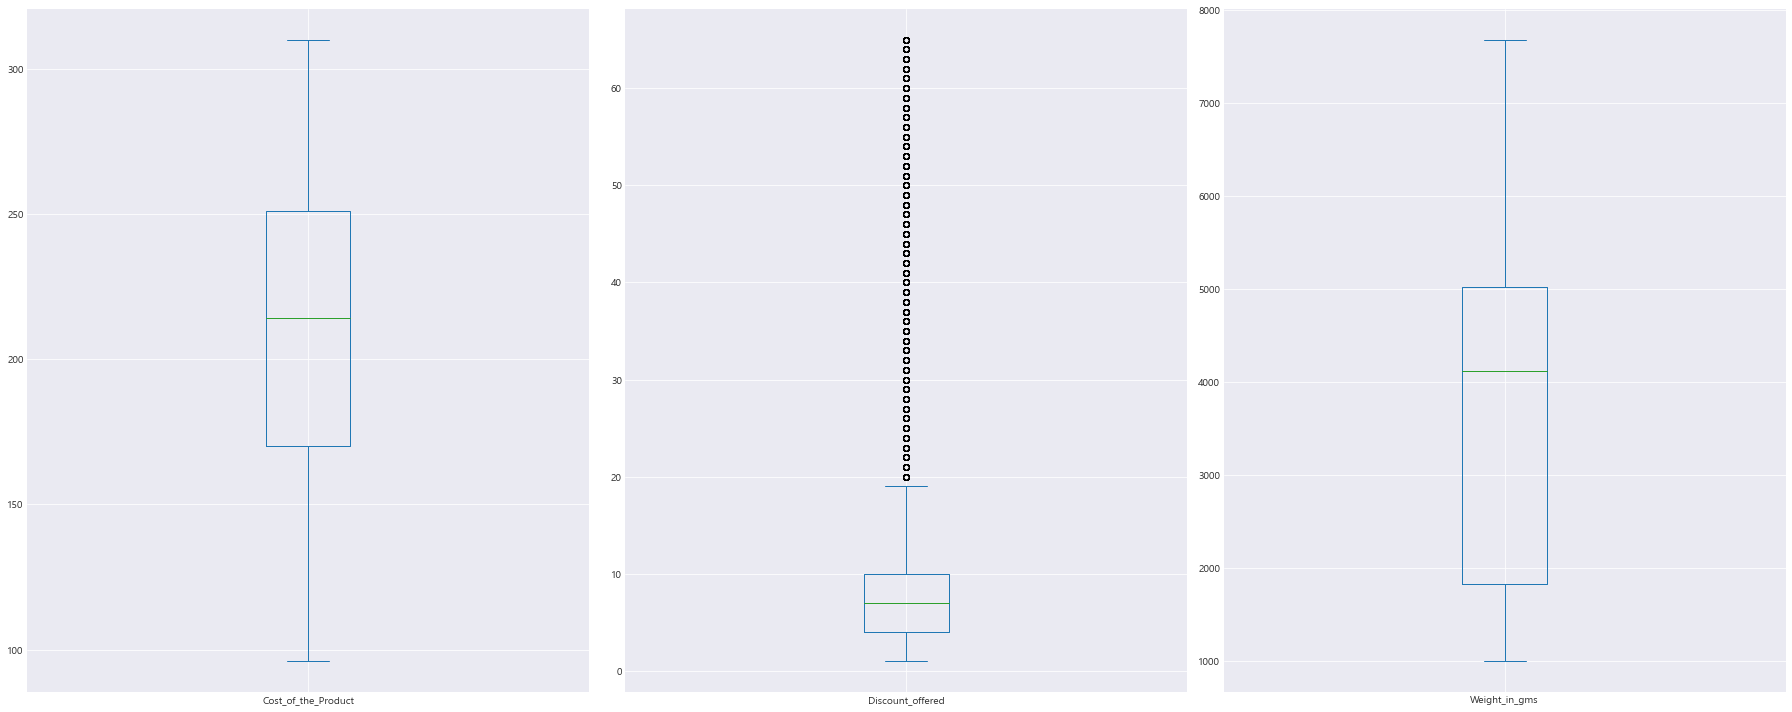

In [13]:
import matplotlib.pyplot as plt
df[col_num].plot(kind='box',subplots=True,layout = (1, 3),figsize=(25,10))
plt.tight_layout()
plt.show()

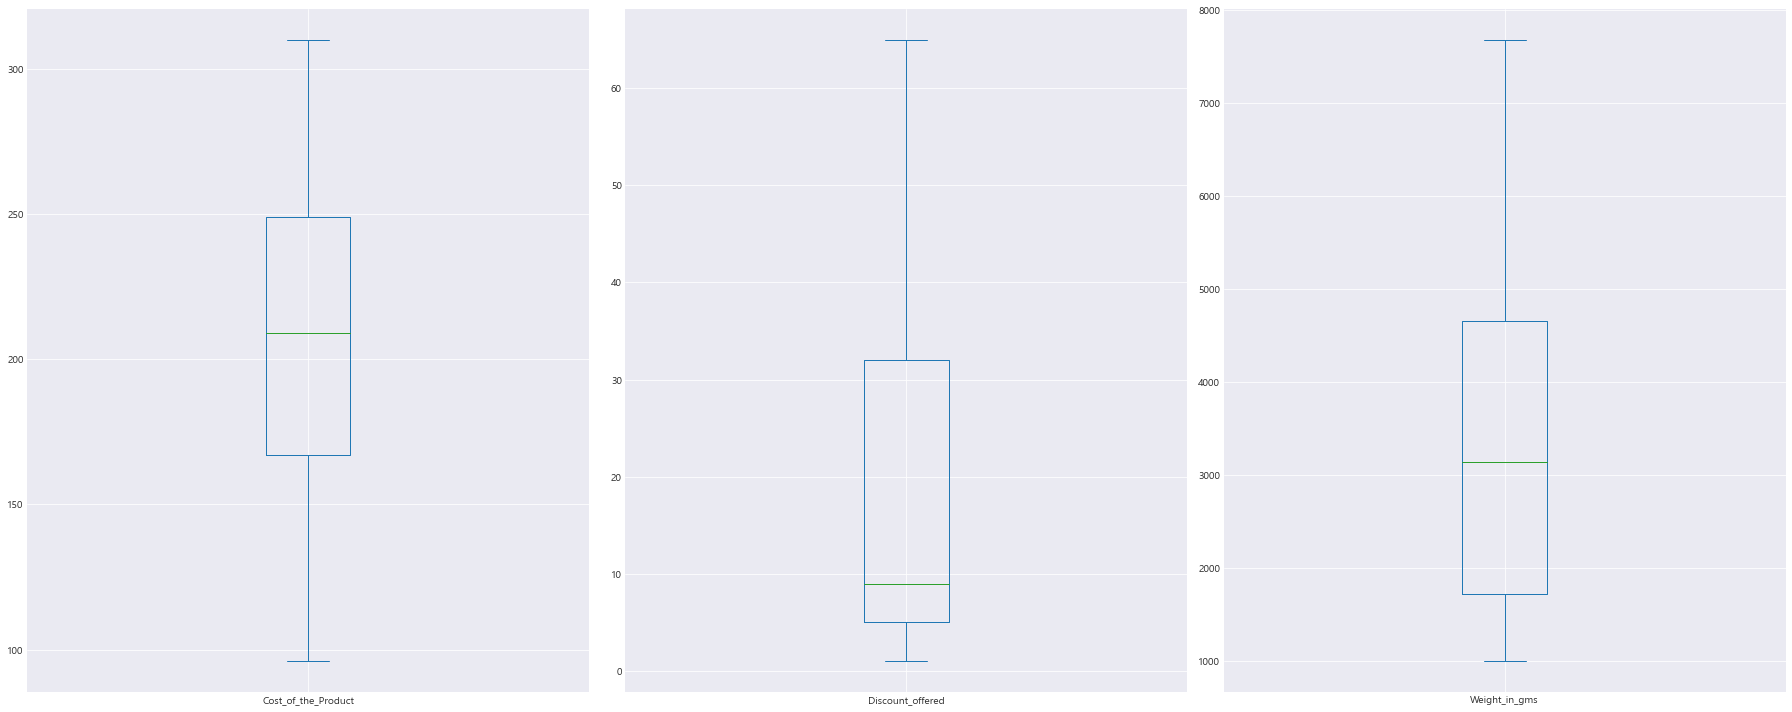

In [14]:
# 1: not reached on time
import matplotlib.pyplot as plt
df[df['Reached.on.Time_Y.N'] == 1][col_num].plot(kind='box',subplots=True,layout = (1, 3),figsize=(25,10))
plt.tight_layout()
plt.show()

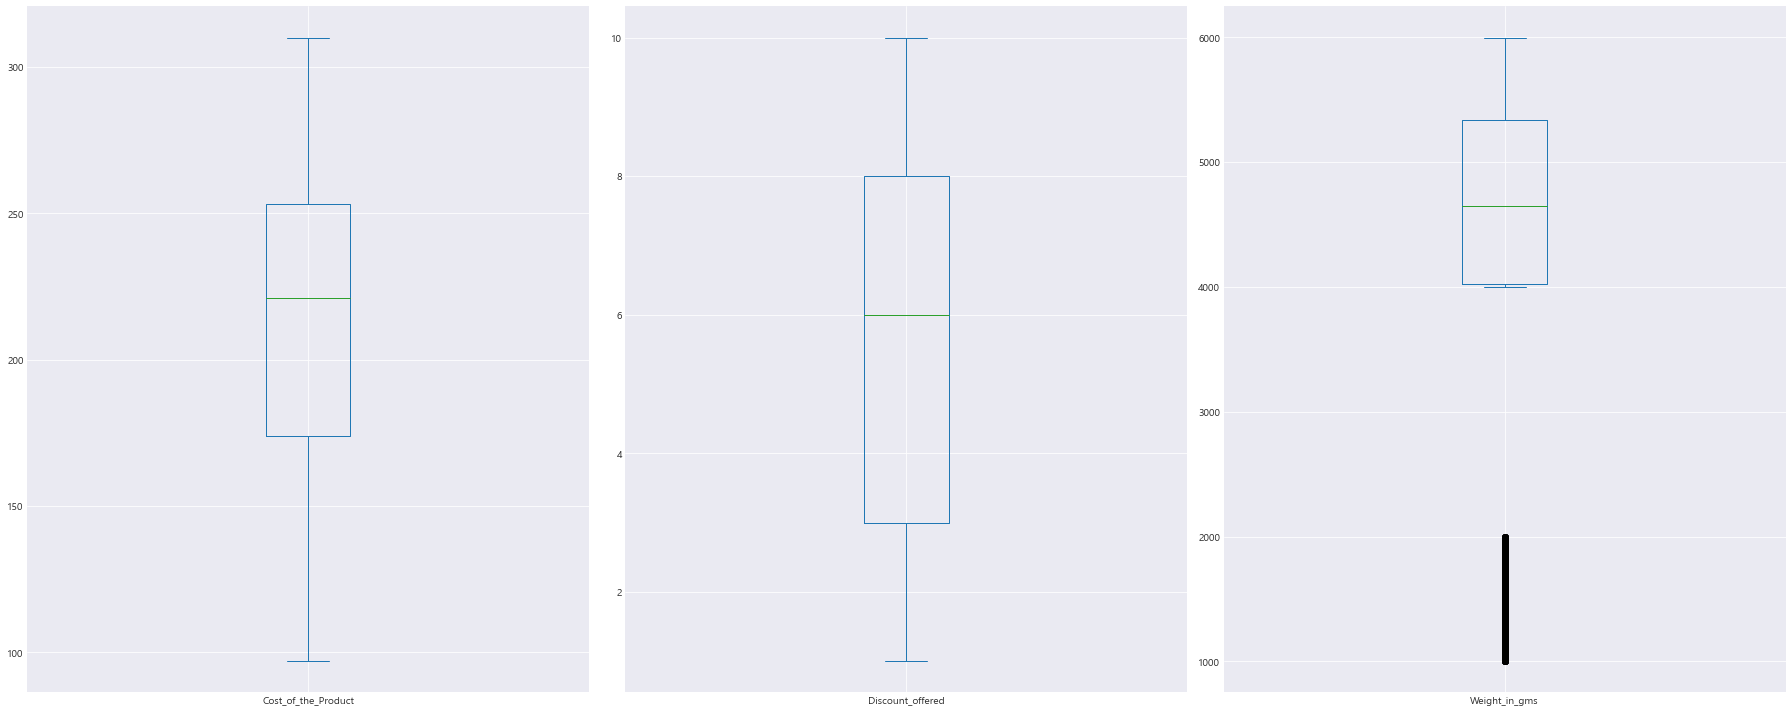

In [15]:
# 0: reached on time
import matplotlib.pyplot as plt
df[df['Reached.on.Time_Y.N'] == 0][col_num].plot(kind='box',subplots=True,layout = (1, 3),figsize=(25,10))
plt.tight_layout()
plt.show()

### correlation matrix
- 

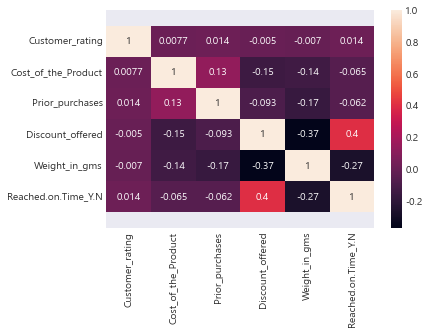

In [16]:
correlation_matrix = df.corr() # 상관계수 계산

ax = sns.heatmap(correlation_matrix, annot=True)
ylim = ax.get_ylim() # y축 범위
ax.set_ylim(ylim[0] + 0.5, ylim[1] - 0.5)
plt.show()

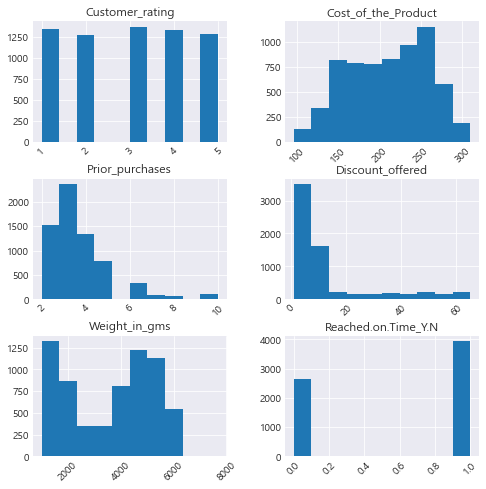

In [17]:
df.hist(figsize=(8,8), xrot=45)
plt.show()

# #2 통계분석
- 아래 feature간 통계분석을 자유롭게 수행하고 결과를 서술해주세요
    - Customer rating ~ Reached on time
    - Product importance ~ Customer rating

- 정규성
- 독립성
- 등분산성

### Customer rating ~ reached on time

##### `Customer_rating` 정규성 검정

$H_0$ : `Customer_rating`이 정규성을 만족시킨다.

- significance_level 5%에서의 critical_value 0.787지만 검정통계량이 233이 나왔으므로 귀무가설 기각
- 정규성을 만족하지 않음

In [21]:
# 정규성 검정
import scipy.stats as stats
print(stats.anderson(x = df['Customer_rating'], dist = 'norm'))

AndersonResult(statistic=233.76542834404245, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


##### 윌콕슨 순위합 검정
$H_0$ : reached on time에 따른 customer rating 평균은 같다

$H_1$ : reached on time에 따른 customer rating 평균은 다르다

- 신뢰수준 5%에서 pvalue 0.27이므로 귀무가설 기각 실패

- reached on time에 따른 customer rating 평균은 같다

In [25]:
on_time = df[df['Reached.on.Time_Y.N'] == 0]['Customer_rating']
not_on_time = df[df['Reached.on.Time_Y.N'] == 1]['Customer_rating']
print(on_time.shape)
print(not_on_time.shape)

(2661,)
(3937,)


In [28]:
stats.ranksums(on_time, not_on_time)

RanksumsResult(statistic=-1.087743806207167, pvalue=0.27670822311886134)

### Product importance ~ Customer rating

- Product importance에 따라 Customer rating이 다른지 검정

- `Product importance` : low, medium, high
    - 세 표본간의 윌콕슨 순위함 검정에서 pvalue가 신뢰수준 5% 이상 통계량이 나왔기에 귀무가설 기각 실패
    
- `Product importance`에 따라 `Customer rating`의 평균값은 같다고 통계적 추론을 할 수 있다.

In [30]:
low = df[df['Product_importance'] == 'low']['Customer_rating']
medium = df[df['Product_importance'] == 'medium']['Customer_rating']
high = df[df['Product_importance'] == 'high']['Customer_rating']
print(low.shape)
print(medium.shape)
print(high.shape)

(3162,)
(2866,)
(570,)


In [32]:
stats.ranksums(low, medium)

RanksumsResult(statistic=-1.1659803379217881, pvalue=0.24362239517465134)

In [33]:
stats.ranksums(high, medium)

RanksumsResult(statistic=-0.9204885876968016, pvalue=0.35731749406986335)

In [34]:
stats.ranksums(low, high)

RanksumsResult(statistic=0.23698575114487153, pvalue=0.8126678443686217)

<AxesSubplot:>

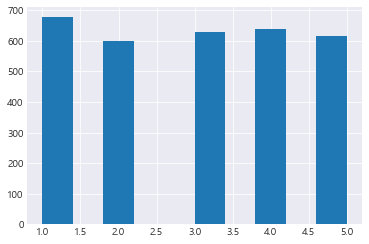

In [35]:
low.hist()

<AxesSubplot:>

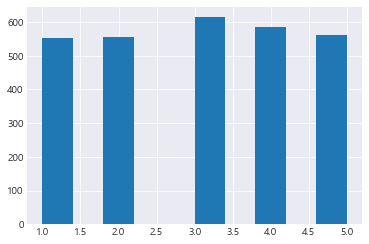

In [36]:
medium.hist()

<AxesSubplot:>

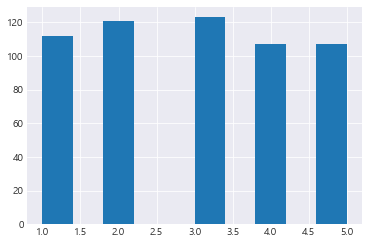

In [37]:
high.hist()

# #3 전처리
- 필요한 전처리를 한 후, 처리한 이유를 서술해주세요

# #4 모델링 및 예측
- 모델링
    - 3가지 모델을 선택해 모델링해주세요.
    - 모델을 선택한 이유를 서술해주세요
- 예측
    - 성능지표를 3가지 선택해 측정해주세요
    - 지표를 선택한 이유를 서술해주세요

# #5 추가적인 개선 방안
을 서술해주세요